In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Loading IMDb Dataset (only top 10,000 frequent words)
vocab_size = 10000
max_len = 200  # max review length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print("Training samples:", len(x_train))
print("Test samples:", len(x_test))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000


In [ ]:
# 3. LSTM Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Embedding layer turns word indices into dense vectors.

# LSTM layer captures word order and context.

# Dense layers add decision power.

# Sigmoid output because it's binary classification (positive or negative review).

In [ ]:
# 4. Training the Model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6853 - loss: 0.5793 - val_accuracy: 0.8590 - val_loss: 0.3395
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9036 - loss: 0.2510 - val_accuracy: 0.8752 - val_loss: 0.2986
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9377 - loss: 0.1762 - val_accuracy: 0.8618 - val_loss: 0.3473
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9547 - loss: 0.1253 - val_accuracy: 0.8676 - val_loss: 0.3489
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9728 - loss: 0.0832 - val_accuracy: 0.8630 - val_loss: 0.4402


In [ ]:
# Loading word index used by IMDb dataset
word_index = imdb.get_word_index()#Gives every word in dataset a number
word_index = {k: (v + 3) for k, v in word_index.items()}#moves everything 3 idxs away so that padding ,start can be added
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 #To represents words that are not in the top
word_index["<UNUSED>"] = 3 #A placeholder for a potentially unused index.

# Reverse index to convert back if needed
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to encode user input
def encode_review(text):
    tokens = text.lower().split()
    encoded = [1]  # start token
    for word in tokens:
        encoded.append(word_index.get(word, 2))  # 2 = <UNK>
    return pad_sequences([encoded], maxlen=max_len)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Example user input
user_review = "This movie was absolutely amazing, I loved every part of it"
encoded_review = encode_review(user_review)

prediction = model.predict(encoded_review)[0][0]
sentiment = "Positive" if prediction > 0.5 else "Negative"

print(f"Review: {user_review}")
print(f"Predicted Sentiment: {sentiment} ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Review: This movie was absolutely amazing, I loved every part of it
Predicted Sentiment: Positive 


In [ ]:
# 5. Evaluation of the Model on Test Set
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

    Negative       0.87      0.84      0.85     12500
    Positive       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



<Figure size 600x400 with 0 Axes>

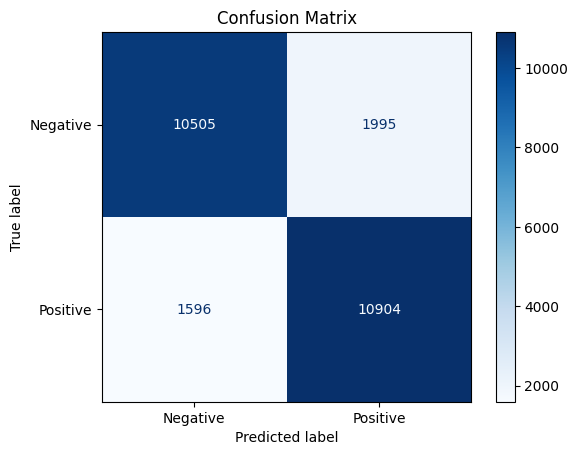

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Saving full model 
model.save("sentiment_lstm_model.h5")
print("Full model saved as 'sentiment_lstm_model.h5'")


Full model saved as 'sentiment_lstm_model.h5'


In [ ]:
model.save_weights("sentiment_lstm.weights.h5")
print("Model weights saved as 'sentiment_lstm.weights.h5'")


Model weights saved as 'sentiment_lstm.weights.h5'


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("sentiment_lstm_model.h5")
